In [1]:
# sys, file and nav packages:
%load_ext watermark
import datetime as dt
# import slugify

# math packages:
import pandas as pd
import numpy as np
# from scipy import stats
import datetime as dt 
# from statsmodels.distributions.empirical_distribution import ECDF
# from scipy.stats import binom
# from scipy import optimize
# from scipy.stats import beta

# charting:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns


# documenting
# from IPython.display import display, HTML
from IPython.display import Markdown as md
from myst_nb import glue


dfCodes = pd.read_csv("resources/data/u_codes.csv")


columns_i = [
    'loc_date',
    'slug',
    'date',
    'doy',
    'water_name_slug',
    'water',
    'river_bassin',
    'city',
    'code', 
    'quantity',
    'pcs_m', 
]
columns = [
    'loc_date',
    'slug',
    'date',
    'doy',
    'Project',
    'water_name_slug',
    'water',
    'river_bassin',
    'city',
    'code', 
    'quantity',
    'pcs_m', 
]
all_data = pd.read_csv("resources/data/u_all_data.csv")
all_data["date"] = pd.to_datetime(all_data["date"], format="%Y-%m-%d")
all_data["slug"] = all_data.location
not_in = ['monte-generoso', 'schiffenensee_duedingen_hirschij', 'sihlsee_einsiedeln_schilligerllacherl']
all_data = all_data[~all_data.location.isin(not_in)].copy()


lac_leman_regions = pd.read_csv("resources/data/lac_leman_regions.csv")

# map to code decriptions
dfCodes.set_index("code", inplace=True)
code_d = dfCodes["description"]

# map to material descriptions
mat_d = dfCodes["material"]

In [2]:
all_data.head()

,loc_date,location,date,doy,water_name_slug,water,river_bassin,city,code,quantity,pcs_m,slug
0,"('aabach', '2020-10-22')",aabach,2020-10-22,296,zurichsee,l,linth,Schmerikon,G1,0,0.0,aabach
1,"('aabach', '2020-10-22')",aabach,2020-10-22,296,zurichsee,l,linth,Schmerikon,G10,0,0.0,aabach
2,"('aabach', '2020-10-22')",aabach,2020-10-22,296,zurichsee,l,linth,Schmerikon,G100,0,0.0,aabach
3,"('aabach', '2020-10-22')",aabach,2020-10-22,296,zurichsee,l,linth,Schmerikon,G101,0,0.0,aabach
4,"('aabach', '2020-10-22')",aabach,2020-10-22,296,zurichsee,l,linth,Schmerikon,G102,0,0.0,aabach


In [3]:
def data_profile(all_data):
    date_min = all_data["date"].min()
    date_max = all_data["date"].max()

    if "location" in all_data.columns:
        nlocations = all_data.location.nunique()
    else:
        nlocations = all_data.slug.nunique()
    ncodes = all_data.code.nunique()
    ncities = all_data.city.nunique()
    nlakes = all_data[all_data.water == "l"].water_name_slug.nunique()
    nrivers = all_data[all_data.water == "r"].water_name_slug.nunique()
    quantity = all_data.quantity.sum()
    nsamples = all_data.loc_date.nunique()

    a_profile = dict(
        start = date_min,
        end = date_max,
        nlocations = nlocations,
        ncodes = ncodes,
        ncities = ncities,
        nlakes = nlakes,
        nrivers = nrivers,
        quantity = quantity,
        nsamples = nsamples
    )

    return a_profile  

In [4]:
# this defines the css rules for the note-book table displays
header_row = {'selector': 'th:nth-child(1)', 'props': f'background-color: #FFF; text-align:right'}
even_rows = {"selector": 'tr:nth-child(even)', 'props': f'background-color: rgba(139, 69, 19, 0.08);'}
odd_rows = {'selector': 'tr:nth-child(odd)', 'props': 'background: #FFF;'}
table_font = {'selector': 'tr', 'props': 'font-size: 10px;'}
table_data = {'selector': 'td', 'props': 'padding: 6px;'}
table_caption = {'selector': 'caption', 'props': 'font-size: 14px; font-style: italic; caption-side: bottom; text-align: left; margin-top: 10px'}
table_css_styles = [even_rows, odd_rows, table_font, header_row, table_caption]

table_large_data = {'selector': 'tr', 'props': 'font-size: 14px;'}
table_large_font = [even_rows, odd_rows, table_large_data, header_row, table_caption]

In [5]:
summary_iqaasl_data = [data_profile(all_data)]

pd.DataFrame(summary_iqaasl_data)

,start,end,nlocations,ncodes,ncities,nlakes,nrivers,quantity,nsamples
0,2015-11-23,2021-11-14,232,228,131,16,38,192380,1432


In [6]:
cois = cities_of_interest = ['Saint-Sulpice (VD)', 'Saint Gingolph', 'Genéve', 'Cully', 'Vevey']
toi = trash_of_interest = ['Gfrags', 'G30', 'G27', 'Gfoam', 'G95', 'G144', 'G98','Gcaps', 'G67', 'G35', 'G89', 'G31', 'G32', 'G33', 'G25', 'G70', 'G10']
some_quants = [.03, .25, .48, .5, .52, .75, .97]
end_training_date = "2021-05-31"
begin_training_date = "2015-11-15"

use_groups =  {
    'Personal hygiene':['G95', 'G100'],
    'Personal consumption':[
    'G30', 'Gcaps', 'G10', 'G25', 'G27', 'G35', 'G31', 'G32', 'G33'],
    'Industrial/professional': ['G67', 'G89', 'Gfoam'],
    'Unknown':['Gfrags'],
    'Recreation/sports': ['G70']
}

use_groups_i =  {
    'G95':'Personal hygiene',
    'G100':'Personal hygiene', 
    'G30':'Personal consumption',
    'Gcaps':'Personal consumption',
    'G10':'Personal consumption',
    'G25':'Personal consumption',
    'G27':'Personal consumption',
    'G35':'Personal consumption',
    'G31':'Personal consumption',
    'G32':'Personal consumption',
    'G33':'Personal consumption',
    'G144':'Personal hygiene',
    'G98': 'Personal hygiene',
    'G67':'Industrial/professional',
    'G89':'Industrial/professional',
    'Gfoam':'Industrial/professional',
    'Gfrags':'Unknown',
    'G70':'Recreation/sports'
}

abbrev_use_g = {'Unknown':'Unk','Personal consumption':'Pc', 'Personal hygiene': 'Ph',    'Recreation/sports': 'Rc', 'Industrial/professional':'Ip'}

column_names_groups = {v:k for k,v in abbrev_use_g.items()}
code_groups = list(column_names_groups.keys())

lake = 'lac-leman'

not_these = ['amphion', 'anthy', 'excenevex', 'lugrin', 'meillerie', 'saint-disdille', 'tougues']
                               
def training_testing_compare(lh_pcs, pcs, post_quants, prior_quants):
    

    # total_testing = np.sum(lh_pcs)
    # lh_ptotal = lh_data.quantity.sum()/total_testing
    total_training = len(pcs) + len(lh_pcs)
    prior_weight = len(pcs)/total_training
    lh_weight = len(lh_pcs)/total_training

    number_of_samples = {"Training": len(pcs), "Testing": len(lh_pcs)}
    weights = {"Training":prior_weight, "Testing": lh_weight}
    observed_median = {"Training":np.median(pcs), "Testing": np.median(lh_pcs)}
    observed_average = {"Training":np.mean(pcs), "Testing": np.mean(lh_pcs)}
    observed_25 = {"Training": prior_quants[1], "Testing":post_quants[1]}
    observed_75 = {"Training": prior_quants[5], "Testing":post_quants[5]}
    index = ["weight all samples", "Number of samples", "Median", "Average", "25th percentile", "75th percentile"]
    components = [weights, number_of_samples, observed_median, observed_average, observed_25, observed_75]
    unks_sum_table = pd.DataFrame(components, index=index).style.format(precision=2).set_table_styles(table_large_font)
    styled = unks_sum_table.format(formatter="{:.0f}", subset=pd.IndexSlice[['Number of samples'], :])
    
    return styled

In [7]:
plastock = pd.read_csv("resources/data/u_pstk.csv")
plastock["date"] = pd.to_datetime(plastock['date'])
plastock["water_name_slug"] = "lac-leman"
plastock["water"] = "l"
plastock.head()

,location,date,area,length,project,doy,quantity,code,loc_date,pcs/m,pcs/m²,slug,Project,city,water_name_slug,water
0,amphion,2022-02-01,440.0,91.0,plastock,32,1,G113,"('amphion', '2022-02-01')",0.010989,0.002273,amphion,Testing,Amphion,lac-leman,l
1,amphion,2022-02-01,440.0,91.0,plastock,32,40,G114,"('amphion', '2022-02-01')",0.439560,0.090909,amphion,Testing,Amphion,lac-leman,l
2,amphion,2022-02-01,440.0,91.0,plastock,32,1,G131,"('amphion', '2022-02-01')",0.010989,0.002273,amphion,Testing,Amphion,lac-leman,l
3,amphion,2022-02-01,440.0,91.0,plastock,32,1,G148,"('amphion', '2022-02-01')",0.010989,0.002273,amphion,Testing,Amphion,lac-leman,l
4,amphion,2022-02-01,440.0,91.0,plastock,32,2,G211,"('amphion', '2022-02-01')",0.021978,0.004545,amphion,Testing,Amphion,lac-leman,l


In [8]:
summary_plastock_data = [data_profile(plastock)]

pd.DataFrame(summary_plastock_data)

,start,end,nlocations,ncodes,ncities,nlakes,nrivers,quantity,nsamples
0,2022-01-10,2022-12-17,25,74,24,1,0,28421,95


In [9]:
pBeaches = pd.read_csv("resources/data/u_asl_beaches.csv")
pBeaches.head()

,location,loc_date,Orientation,latitude,longitude,position,substrate,area,time,length,city,slug
0,Amphion,74_Amp_1,NE,46.398117,6.534083,1,4,98,50,91,Amphion,amphion
1,Amphion,74_Amp_10,NNE,46.397900,6.534450,2,4,98,50,91,Amphion,amphion
2,Amphion,74_Amp_2,NNE,46.398017,6.534250,1,4,98,50,91,Amphion,amphion
3,Amphion,74_Amp_3,NE,46.398000,6.534350,1,4,98,50,91,Amphion,amphion
4,Amphion,74_Amp_4,NNE,46.397917,6.534583,1,4,98,50,91,Amphion,amphion


In [10]:
cbdi = pd.read_csv("resources/data/u_pstk_iqaasl_all.csv")
cbdi["water"] = "l"
cbdi["water_name_slug"] = "lac-leman"
cbd = cbdi[cbdi.code.isin(toi)]
cbdi.head()

,loc_date,slug,city,water_name_slug,date,doy,Project,code,pcs/m,quantity,water
0,"('anarchy-beach', '2018-04-02')",anarchy-beach,La Tour-de-Peilz,lac-leman,2018-04-02,92,Training,G1,0.00,0.0,l
1,"('anarchy-beach', '2018-04-02')",anarchy-beach,La Tour-de-Peilz,lac-leman,2018-04-02,92,Training,G10,0.06,4.0,l
2,"('anarchy-beach', '2018-04-02')",anarchy-beach,La Tour-de-Peilz,lac-leman,2018-04-02,92,Training,G100,0.14,10.0,l
3,"('anarchy-beach', '2018-04-02')",anarchy-beach,La Tour-de-Peilz,lac-leman,2018-04-02,92,Training,G101,0.00,0.0,l
4,"('anarchy-beach', '2018-04-02')",anarchy-beach,La Tour-de-Peilz,lac-leman,2018-04-02,92,Training,G102,0.00,0.0,l


In [11]:
summary_cbdi = [data_profile(cbdi)]

pd.DataFrame(summary_cbdi)

,start,end,nlocations,ncodes,ncities,nlakes,nrivers,quantity,nsamples
0,2015-11-23,2022-12-17,73,231,38,1,0,108611.0,364


In [12]:
sup_after = pd.read_csv("resources/data/u_sup_after.csv")
sup_after["date"] = pd.to_datetime(sup_after["date"])

summary_sup_after = [data_profile(sup_after)]

pd.DataFrame(summary_sup_after)

,start,end,nlocations,ncodes,ncities,nlakes,nrivers,quantity,nsamples
0,2021-06-02,2022-10-06,5,228,3,1,0,2938,6


(data-context)=
### Summary test and training data

Another way to look at this collection of observations is that each sampling group collected the data for reasons that were specific to that group, the protocol provided a framework for ensuring consistency and a pathway to interpreting the results. However, this does not mean that each group interpreted the protocol in the same manner, nor does it mean that all objects collected were counted. By limiting analysis to specific object-codes, those that appear most often and/or those that are easily identified, uncertainty is reduced by leveraging frequency of occurence and domain experience.

In [13]:
summ_data = cbd.copy()
summ_data = summ_data[~summ_data.slug.isin(not_these)]
summ_data["use group"] = summ_data.code.map(lambda x: use_groups_i[x])

summ_data["ug"] = summ_data["use group"].apply(lambda x: abbrev_use_g[x])
summ_data[summ_data["use group"] == 'Personal consumption'].code.unique()
summ_data["date"] = pd.to_datetime(summ_data["date"], format="%Y-%m-%d")

sd_x = summ_data.groupby(["loc_date", "date", "city", "Project", "doy"], as_index=False).agg({"pcs/m": 'sum', 'quantity':'sum'})

trg = summ_data[summ_data.Project == "Training"].copy()
tst = summ_data[summ_data.Project == "Testing"].copy()
trg_c, tst_c = trg.city.nunique(), tst.city.nunique()
trg_lc, tst_lc = trg.slug.nunique(), tst.slug.nunique()
trg_q, tst_q = trg.quantity.sum(), tst.quantity.sum()

data_magnitude = [
    {"Training":trg_c, "Testing":tst_c},
    {"Training":trg_lc, "Testing":tst_lc},
    {"Training":trg_q, "Testing":tst_q}
    
]

cities_set = list(set([*trg.city.unique(), *tst.city.unique()]))
n_ind_cities = len(cities_set)

caption = f'The number of different locations and cities for the data. Note that there are {n_ind_cities} different municipalitites in all.'

data_summ_q = pd.DataFrame(data_magnitude, index=["Number of cities", "Number of locations", "Total objects"]).astype('int')
data_summ_q = data_summ_q.style.format(formatter="{:,}").set_table_styles(table_large_font).set_caption(caption)
styled = data_summ_q.format(formatter="{:,}", subset=pd.IndexSlice[['Total objects'], :])
glue("data-summ-q", styled, display=True)

,Training,Testing
Number of cities,21,19
Number of locations,48,23
Total objects,"59,839","13,804"


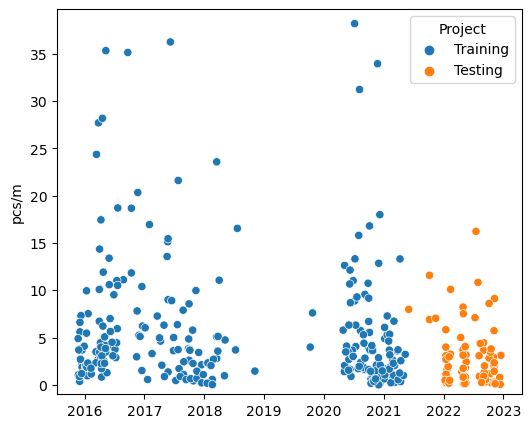

In [14]:
# all the data by date
the_99th_percentile = np.quantile(sd_x['pcs/m'].values, .99)
px = 1/plt.rcParams['figure.dpi']  # pixel in inches
fig, ax = plt.subplots(figsize=(600*px,500*px))

sns.scatterplot(data=sd_x, x='date', y='pcs/m', hue='Project', hue_order=["Training", "Testing"],ax=ax)

ax.set_ylim(-1, the_99th_percentile)
ax.set_xlabel("")
glue("testing_training_chrono", fig, display=True)
plt.close()

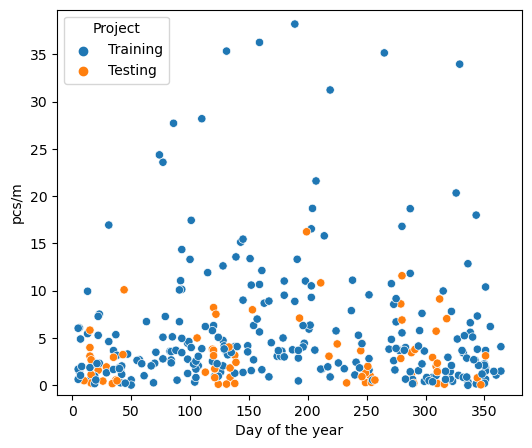

In [15]:
# all the data day of year
fig, ax = plt.subplots(figsize=(600*px, 500*px))

sns.scatterplot(data=sd_x, x='doy', y='pcs/m', hue='Project',  hue_order=["Training", "Testing"],ax=ax)
ax.set_ylim(-1, the_99th_percentile)
ax.set_xlabel("Day of the year")
glue('testing_training_doy', fig, display=True)
plt.close()

In [16]:
testing_vals= sd_x[sd_x.Project == "Testing"]['pcs/m'].values
training_vals = sd_x[sd_x.Project == "Training"]['pcs/m'].values

train_quantiles = np.quantile(training_vals, some_quants)
test_quantiles = np.quantile(testing_vals, some_quants)

training_testing_summary = training_testing_compare(testing_vals, training_vals, test_quantiles, train_quantiles)
caption = "The observed values from the training and testing data. Remark that the testing data is only 22% of all the data. This is because we are only in the first year of a six year sampling period"
sum_table = training_testing_summary.set_caption(caption)
sum_table.format(formatter="{:.0f}", subset=pd.IndexSlice[['Number of samples'], :])
glue("data-summary", sum_table, display=True)

,Training,Testing
weight all samples,0.78,0.22
Number of samples,263,73
Median,3.62,2.34
Average,6.35,3.16
25th percentile,1.63,0.78
75th percentile,6.87,3.99


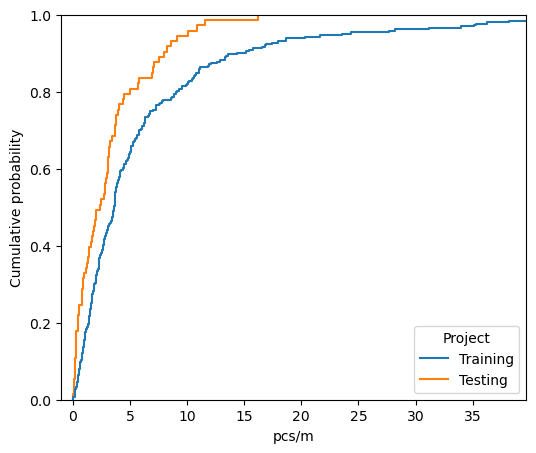

In [17]:
fig, ax = plt.subplots(figsize=(600*px, 500*px))

sns.ecdfplot(data=sd_x, x='pcs/m', hue='Project',  hue_order=["Training", "Testing"],ax=ax)
ax.set_xlim(-1, the_99th_percentile)
ax.set_ylabel("Cumulative probability")
glue('testing_training_cumulative', fig, display=True)
plt.close()

|Figure 1, Table 1 | Table 2, Figure 3|
|:-----------------------:|:---------------------:|
|{glue:}`testing_training_chrono` |{glue}`data-summary`|
|{glue:}`data-summ-q`|{glue}`testing_training_doy`|

In [18]:
add_slugs = [
    'aubonne-pk',
    'baby-plage-pk',
    'bouveret-pk', 
    'clarens-pk',
    'crans-pk',
    'cully-pk',
    'gland-pk',
    'grangettes-pk',
    'hermance-pk',
    'lutry-pk',
    'pichette-pk',
    'port-choiseul-pk',
    'preverenges-pk',
    'rolle-pk',
    'savoniere-pk',
    'tolochenaz-pk',
    'versoix-pk',
    'vidy-pk'
    ]

new_slugs = [
    'aubonne',
    'baby-plage',
    'bouveret', 
    'clarens',
    'crans',
    'cully-p',
    'gland',
    'grangettes',
    'hermance',
    'lutry',
    'pichette',
    'port-choiseul',
    'preverenges-p',
    'rolle',
    'savoniere',
    'tolochenaz-p',
    'versoix-p',
    'vidy-p'
    ]


In [19]:
new_comb_scale = pd.read_csv("resources/data/u_land_use_cover_streets_rivers.csv")
new_comb_scale[new_comb_scale.slug == "vidy-p"]

,slug,magnitude,hex minus,use,scaled,binned
2750,vidy-p,542690,3091890,infrastructure,0.175520,4.0
2751,vidy-p,308422,3091890,recreation,0.099752,2.0
2752,vidy-p,3091551,3091890,Siedl,0.999890,20.0
2753,vidy-p,339,3091890,undefined,0.000110,1.0
2754,vidy-p,31190,0,Strasse,0.119716,3.0
2755,vidy-p,0,0,dist,0.000000,0.0
2756,vidy-p,0,0,Wald,0.000000,0.0
2757,vidy-p,0,0,Stadtzentr,0.000000,0.0
2758,vidy-p,0,0,Reben,0.000000,0.0
2759,vidy-p,0,0,Obstanlage,0.000000,0.0


In [20]:
beach_columns = ['slug','location', 'latitude', 'longitude', 'water_name', 'city', 'river_bassin']
plastock_iqaasl_beaches = pd.read_csv("resources/data/u_iq_ps_beaches.csv")
plastock_iqaasl_beaches.head()

,slug,location,latitude,longitude,water_name,city,river_bassin
0,aabach,Aabach,47.220989,8.940365,Zürichsee,Schmerikon,linth
1,aare-limmatspitz,Aare Limmatspitz,47.501060,8.237371,Aare,Gebenstorf,aare
2,aare-port,Aare Port,47.116170,7.269550,Nidau-Büren-Kanal,Port,aare
3,aare-solothurn-lido-strand,Aare Solothurn Lido Strand,47.196949,7.521643,Aare,Solothurn,aare
4,aare_bern_caveltin,Aare_Bern_CaveltiN,46.923579,7.473319,Aare,Muri bei Bern,aare


In [25]:
lu_scaled = new_comb_scale.pivot(columns="use", values="scaled", index="slug").fillna(0)

lu_magnitude = new_comb_scale.pivot(columns="use", values="magnitude", index="slug").fillna(0)

lu_binned = new_comb_scale.pivot(columns="use", values="binned", index="slug").fillna(0)

merge_locations = cbd.slug.unique()
cbdu = cbd[~cbd.slug.isin(not_these)].merge(lu_scaled[lu_scaled.index.isin(merge_locations )], left_on="slug", right_on="slug", validate="many_to_one", how="outer")

cbdu["use group"] = cbdu.code.map(lambda x: use_groups_i[x])

cbdu["ug"] = cbdu["use group"].apply(lambda x: abbrev_use_g[x])
cbdu[cbdu["use group"] == 'Personal consumption'].code.unique()
cbdu["date"] = pd.to_datetime(cbdu["date"], format="%Y-%m-%d")

cbdu.rename(columns={"pcs/m":"pcs_m"}, inplace=True)

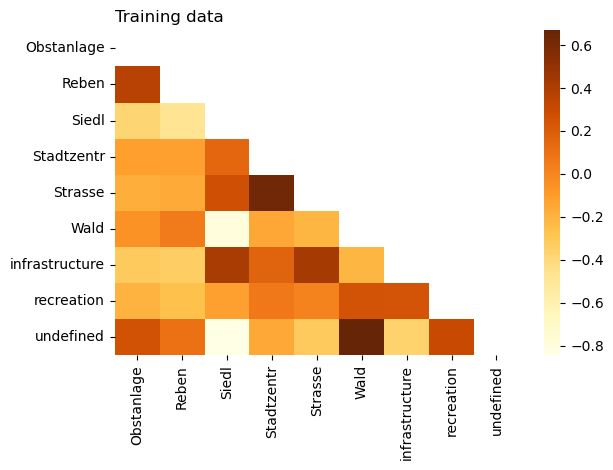

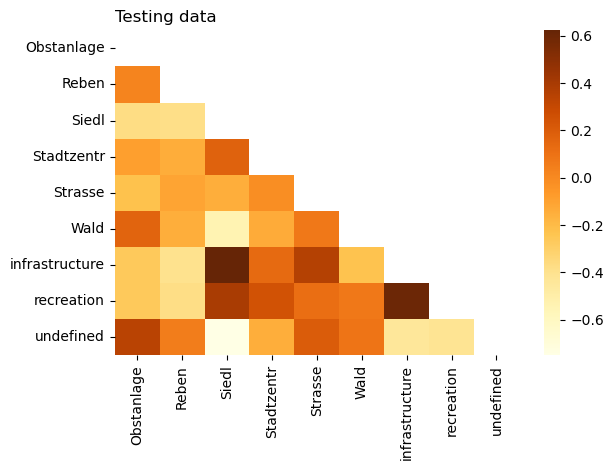

In [22]:
tst_locs = cbdu[(cbdu.Project == 'Testing')].slug.unique()
tr_locs = cbdu[(cbdu.Project == 'Training')].slug.unique()

attribute_columns = [x for x in lu_scaled.columns if x not in ["length", "dist"]]

trc = lu_scaled.loc[tr_locs][attribute_columns]
tst = lu_scaled.loc[tst_locs][attribute_columns]

corr_tst = tst.corr()
corr_trc = trc.corr()

mask_tr = np.triu(np.ones_like(corr_trc, dtype=bool))
mask_ts = np.triu(np.ones_like(corr_tst, dtype=bool))
fig, ax = plt.subplots()

sns.heatmap(corr_trc, mask=mask_tr, cmap="YlOrBr", ax=ax)


ax.set_ylabel("")
ax.set_xlabel("")
ax.set_title("Training data", loc="left")
plt.tight_layout()

glue("corr_training", fig, display=True)
plt.close()

fig, ax = plt.subplots()

sns.heatmap(corr_tst, mask=mask_ts, cmap="YlOrBr", ax=ax)

ax.set_ylabel("")
ax.set_xlabel("")
ax.set_title("Testing data", loc="left")
plt.tight_layout()

glue("corr_testing", fig, display=True)
plt.close()

|   Figure 3             |     Figure 4                  |
|:----------------------:|:-----------------------------:|
|{glue:}`corr_training`| {glue:}`corr_testing`    | 
|Correlation of land-use variables from the prior data. | Correlation of land-use variables from the likelihood data|

In [23]:
today = dt.datetime.now().date().strftime("%d/%m/%Y")
where = "Biel, CH"

my_block = f"""

This script updated {today} in {where}

\u2764\ufe0f __what you do everyday:__ *analyst at hammerdirt*
"""

md(my_block)



This script updated 04/10/2023 in Biel, CH

❤️ __what you do everyday:__ *analyst at hammerdirt*


In [24]:
%watermark --iversions -b -r

Git repo: https://github.com/hammerdirt-analyst/patelmanuscript.git

Git branch: newsummary

seaborn   : 0.12.2
matplotlib: 3.7.1
pandas    : 2.0.2
numpy     : 1.24.3

